In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.linalg import eigh
from sklearn.datasets  import load_digits

In [2]:
mnist = load_digits()
data = mnist['images']
data.shape


(1797, 8, 8)

In [3]:
data = data.reshape(data.shape[0], -1)
data.shape

(1797, 64)

In [4]:
mean_vec = np.mean(data, axis=0)
mean_vec.shape

(64,)

In [5]:
data_norm = data - mean_vec
covariance_matrix = (data_norm).T.dot((data_norm))/(data_norm.shape[0])
covariance_matrix = np.cov(data_norm.T)
eigen_values, eigen_vectors = eigh(covariance_matrix)
#eigen_vectors

In [6]:
eigen_values = np.flip(eigen_values)
#eigen_values

In [7]:
eigen_vectors = np.flip(eigen_vectors,0)
#eigen_vectors

In [8]:
num_of_component = 2
first_eigenvalue = eigen_values[0:2]
first_eigenvalue
first_eigenvector = eigen_vectors[0:2]
#first_eigenvector



In [9]:
dimension_red_data = np.matmul(data,(np.transpose(first_eigenvector)))
dimension_red_data

array([[ -9.36574346,   1.23918543],
       [  4.22625746,  -1.12187157],
       [ -6.54640465,  -3.55103648],
       ...,
       [ -9.70247758,  -3.77109445],
       [ -9.04072961,  -0.67336332],
       [-13.24065139,  -8.21444414]])

In [10]:
df_low_dimen = pd.DataFrame(dimension_red_data,columns=['x','y'])

In [11]:
targets = mnist['target']
plt.scatter(df_low_dimen['x'],df_low_dimen['y'], c = mnist['target'])
plt.title('2-D view of Data points')
plt.xlabel('1-principal component')
plt.ylabel('2-princial component')
plt.rcParams['figure.figsize'] = (15,12)
plt.grid()
#plt.legend()


In [12]:

#explained varience
explained_varience = []
for i in eigen_values:
    explained_varience.append(abs(i)/sum(eigen_values))

    

In [13]:
cum_eigenvalues = np.cumsum(explained_varience)
#cum_eigenvalues

Text(0.5, 1.0, 'Explained varience')

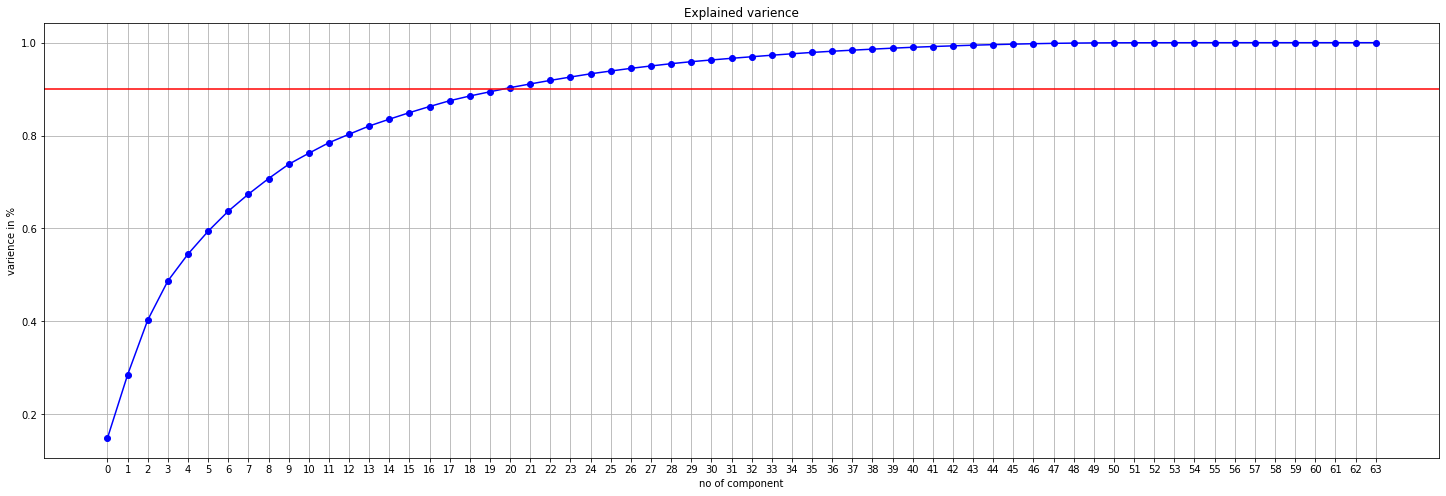

In [14]:
plt.figure(figsize = (25,8))
plt.plot(cum_eigenvalues, marker='o', color = 'b')
plt.axhline(y=0.9, color = 'r')
plt.xticks(np.arange(0, 64, step =1))
plt.xlabel('no of component')
plt.ylabel('varience in %')
plt.grid()
plt.title('Explained varience')


In [15]:
no_of_component= explained_varience[0:22]
total_varince = sum(no_of_component)
total_varince


0.9111697327690564

# Conclusion

Hence, when we choose number of component 21, 91% of information is preserved, as seen in the above graph.